# Credit Card Approval Use Case

- In machine learning, a use case helps describe how a model is applied to solve a real-world problem—from data collection to prediction and deployment.

## Use Case Structure
- A typical use case includes:

    1. Use Case Name → The title of the use case
    2. Actors → The people or systems interacting with the model
    3. Goal → What the system aims to achieve
    4. Preconditions → What needs to be in place before the process starts
    5. Steps → The sequence of actions performed in the process
    6. Alternate Scenarios → What happens if something goes wrong
    7. Postconditions → The expected outcome after the use case completes

### Example: Use Case for Credit Card Approval Model
1. Use Case Name
- Automated Credit Card Approval System


2. Actors
-   Applicant → A person applying for a credit card
-   Machine Learning Model → Predicts approval or rejection
-   Bank System → Collects applications, stores data, and integrates the model

3. Goal
- To automatically approve or reject credit card applications based on applicants' financial data and credit history.
  
4. Preconditions

    - Applicant provides necessary information (income, credit score, job status, etc.).
    - Historical data is available for training the machine learning model.

5. Steps (When Everything Works Fine)

    - Applicant submits a credit card application.
    - The bank system validates and preprocesses the data.
    - The machine learning model predicts Approval (1) or Rejection (0).
    - If approved, the applicant receives a confirmation email.
    - If rejected, the applicant receives a rejection message with possible reasons.

6. Alternate Scenarios (Edge Cases)

    - Missing Data → System prompts the user to complete the form.
    - Unclear Decision → Application is sent for manual review.
    - Fraudulent Data → The system flags it for investigation.

7. Postconditions (Expected Outcome)

    - The applicant is notified of their approval/rejection status.
    - The bank updates its database with the decision.

# ---------- UNDERSTANDING THE BUSINESS PROBLEM ----------

### Credit card companies need to decide who to approve for credit cards
#### Benefits of using machine learning for credit card approval:
 1. Faster decisions - automated systems can process applications in seconds
 2. Consistency - all applications are evaluated using the same criteria
 3. Accuracy - ML can find patterns humans might miss
- A good model helps banks:
  - Approve more creditworthy customers (increasing revenue)
  - Reject high-risk applicants (reducing losses from defaults)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Classification
from sklearn.metrics import accuracy_score

In [ ]:
column_names = [
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
    'A11', 'A12', 'A13', 'A14', 'A15', 'Target'
]

In [ ]:
df = pd.read_csv('crx.data', names=column_names,  na_values='?') # https://archive.ics.uci.edu/dataset/27/credit+approval

In [ ]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [ ]:
df.shape

(690, 16)

In [ ]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [ ]:
df.sample(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
483,b,23.75,0.415,y,p,c,v,0.040,f,t,2,f,g,128.0,6,-
369,b,21.42,0.750,y,p,r,n,0.750,f,f,0,t,g,132.0,2,-
209,b,39.50,4.250,u,g,c,bb,6.500,t,t,16,f,g,117.0,1210,+
248,b,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,+
576,b,30.17,0.500,u,g,c,v,1.750,t,t,11,f,g,32.0,540,+
79,b,21.50,9.750,u,g,c,v,0.250,t,f,0,f,g,140.0,0,-
224,a,37.75,5.500,u,g,q,v,0.125,t,f,0,t,g,228.0,0,+
108,b,40.92,2.250,y,p,x,h,10.000,t,f,0,t,g,176.0,0,-
90,b,62.50,12.750,y,p,c,h,5.000,t,f,0,f,g,112.0,0,-
40,b,34.17,9.170,u,g,c,v,4.500,t,t,12,t,g,0.0,221,+


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  Target  0 non-null      float64
dtypes: float64(5), int64(2), object(9)
memory usage: 86.4+ KB


In [ ]:
df['A1'].unique()

array(['b', 'a', nan], dtype=object)

In [ ]:
df['A1'].value_counts()

A1
b    468
a    210
Name: count, dtype: int64

In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_percent[missing_percent > 0]

,0
A1,1.739130
A2,1.739130
A4,0.869565
A5,0.869565
A6,1.304348
A7,1.304348
A14,1.884058


In [ ]:
df.isnull().sum()

,0
A1,0
A2,12
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


In [ ]:
df['A1'].mode()

0    b
Name: A1, dtype: object

In [ ]:
df['A1'].mode()[0]

'b'

In [ ]:
df['A1'] = df['A1'].fillna(df['A1'].mode()[0])
df['A4'] = df['A4'].fillna(df['A4'].mode()[0])
df['A5'] = df['A5'].fillna(df['A5'].mode()[0])
df['A6'] = df['A6'].fillna(df['A6'].mode()[0])
df['A7'] = df['A7'].fillna(df['A7'].mode()[0])


# df['A1'].fillna(df['A1'].mode(), inplace=True)

In [ ]:
df.isnull().sum()

,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


In [ ]:
df['A2'] = df['A2'].fillna(df['A2'].median())
df['A14'] = df['A14'].fillna(df['A2'].mean())

In [ ]:
df.isnull().sum()

,0
A1,12
A2,0
A3,0
A4,6
A5,6
A6,9
A7,9
A8,0
A9,0
A10,0


In [ ]:
# Fill missing values with the median
num_columns = ['A2', 'A14']
imputer = SimpleImputer(strategy='median')
df[num_columns] = imputer.fit_transform(df[num_columns])

In [ ]:
df.isnull().sum()

,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


In [ ]:
# HomeWork


In [ ]:
# for col in df.columns:
#     print(f"Unique values in {col}:")
#     print(df[col].unique())

In [ ]:
# df = pd.read_csv('data.crx', na_values=['?', 'NA', 'N/A', '-', ' '])
# df.replace(['?', 'NA', 'N/A', '-', ' '], np.nan)
# df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,b,b,b,b,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,a,a,a,a,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,a,a,a,a,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,b,b,b,b,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,b,b,b,b,1.71,t,f,0,f,s,120.0,0,+


In [ ]:
cat_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
df[cat_cols] = df[cat_cols].astype(str) # type casting

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
df[cat_cols] = df[cat_cols].astype(str)

In [ ]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,b,b,b,b,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,a,a,a,a,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,a,a,a,a,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,b,b,b,b,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,b,b,b,b,1.71,t,f,0,f,s,120.0,0,+


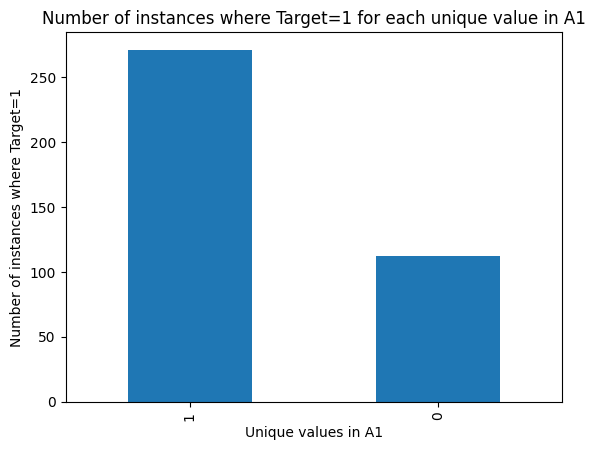

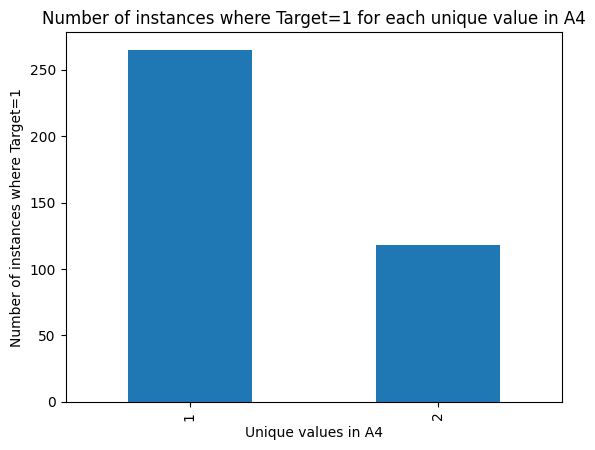

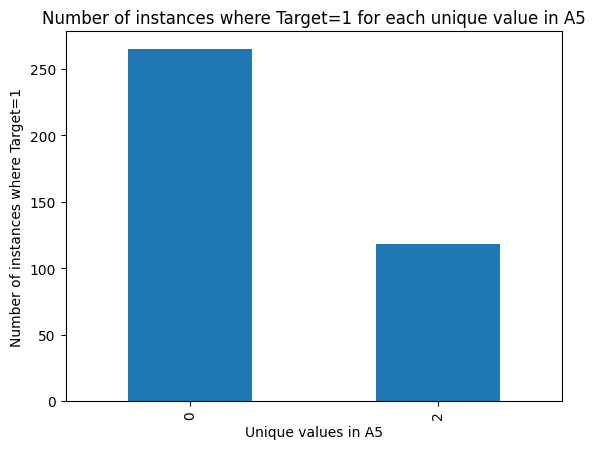

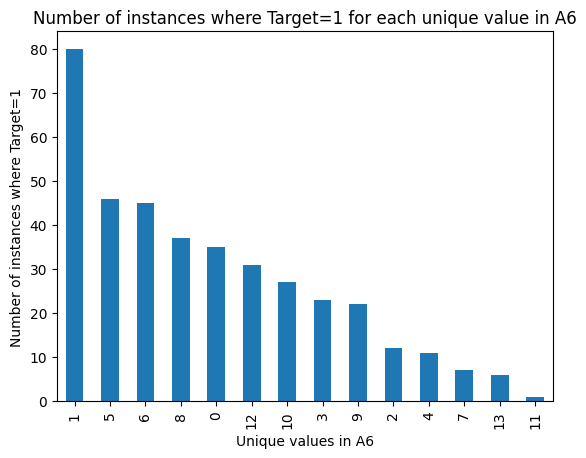

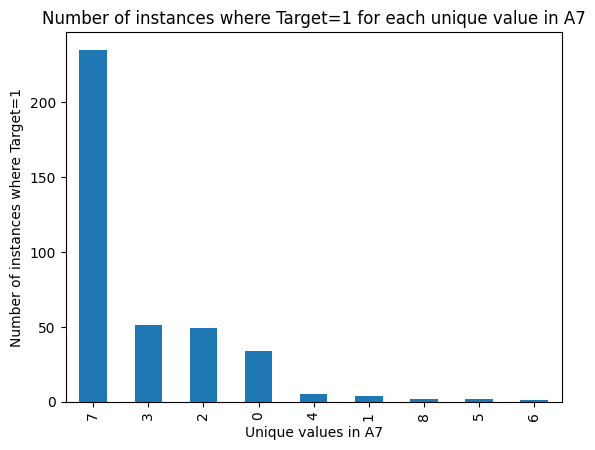

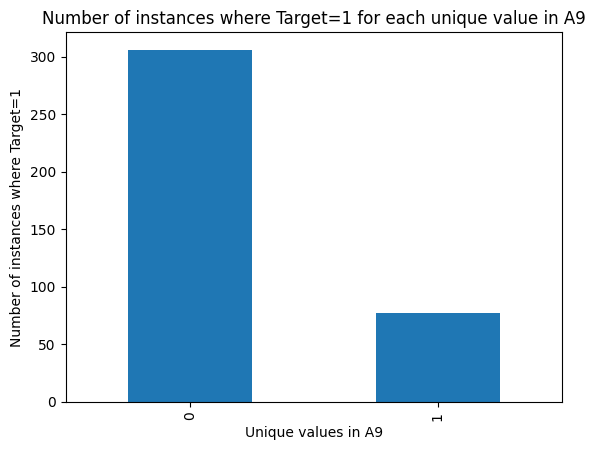

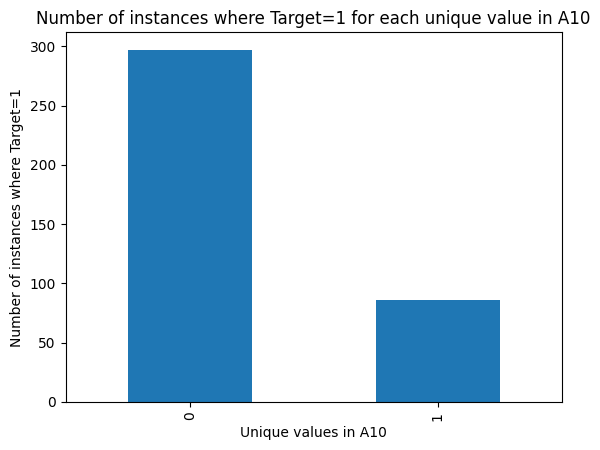

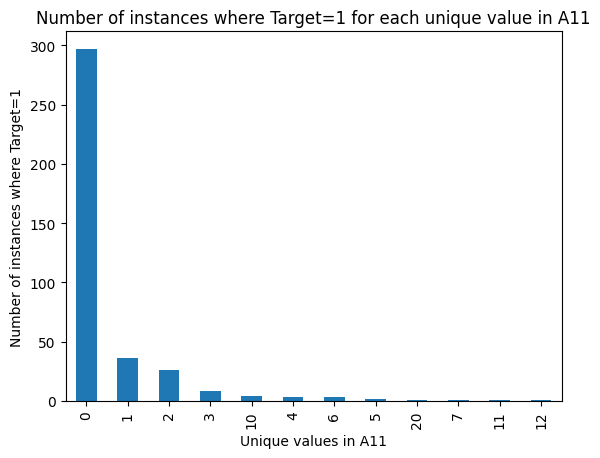

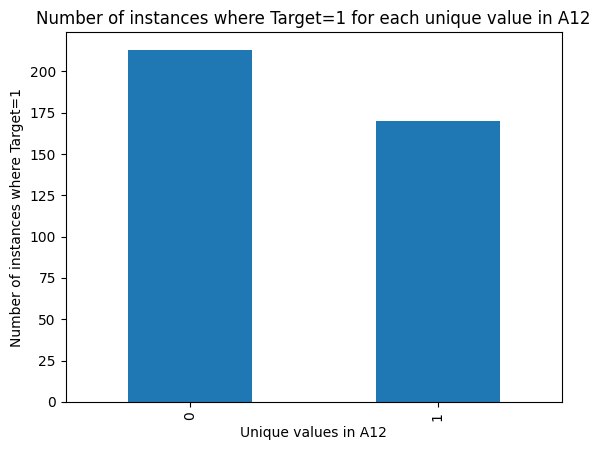

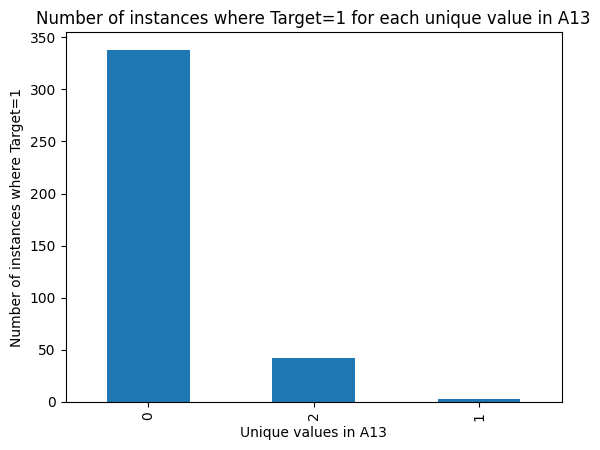

In [ ]:
import matplotlib.pyplot as plt

def plot_unique_value_counts(df, check, result):
    # Filter the DataFrame where result is 1
    filtered_df = df[df[result] == 1]

    # Count the occurrences of unique values in the check column where result is 1
    counts = filtered_df[check].value_counts()

    # Create the bar chart
    counts.plot(kind='bar')
    plt.xlabel(f'Unique values in {check}')
    plt.ylabel(f'Number of instances where {result}=1')
    plt.title(f'Number of instances where {result}=1 for each unique value in {check}')
    plt.show()

cat_plot_col = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A11", "A12", "A13"]
for col in cat_plot_col:
  plot_unique_value_counts (df, col, 'Target')

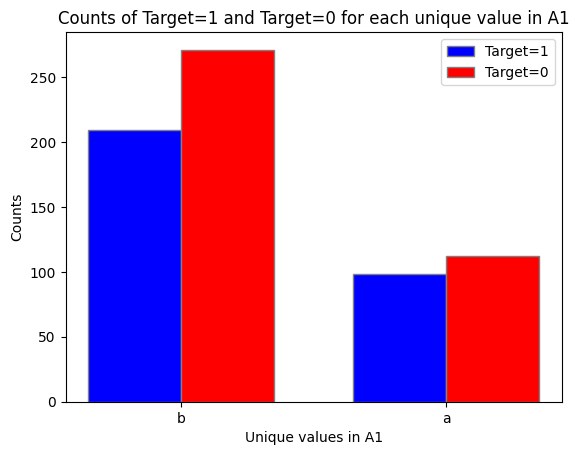

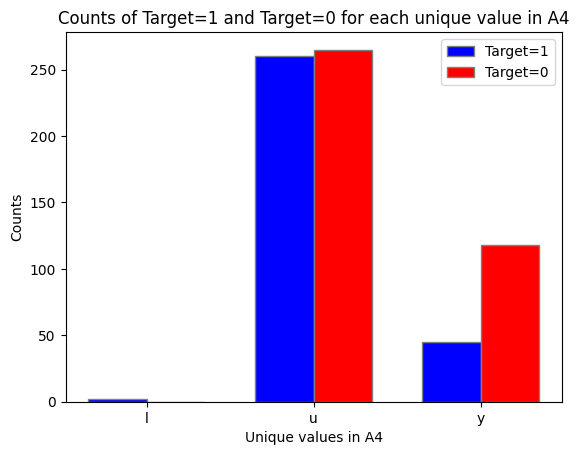

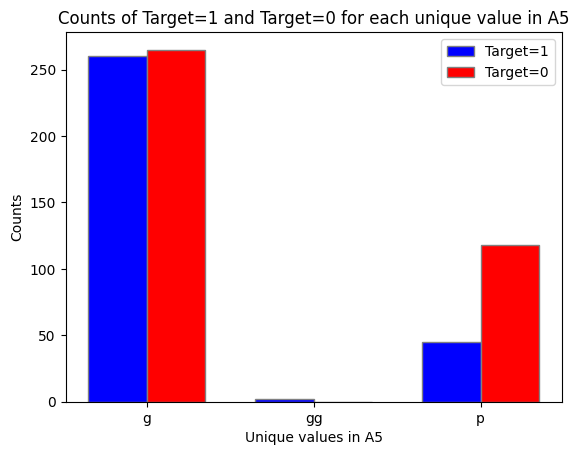

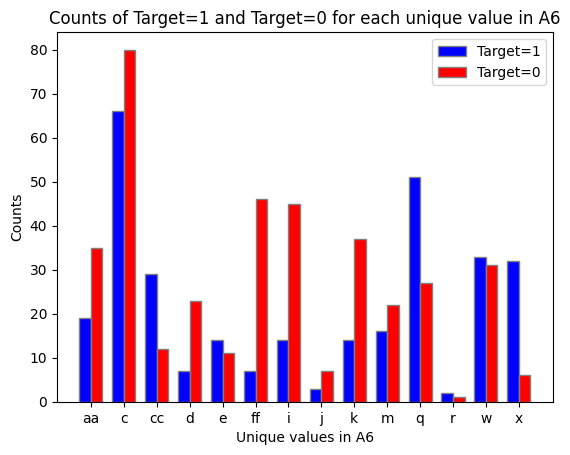

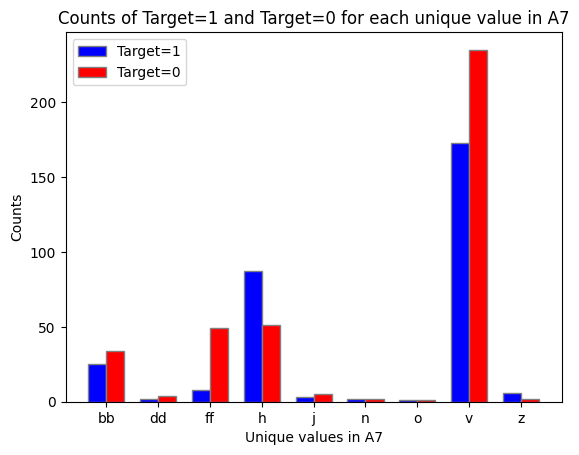

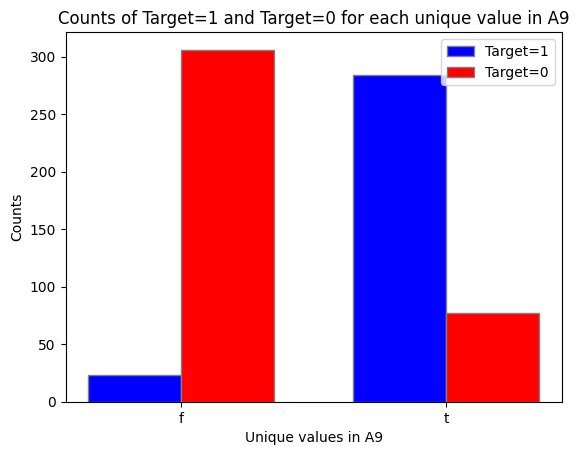

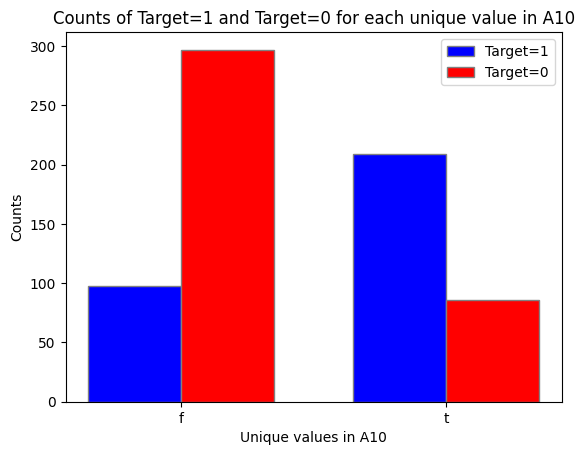

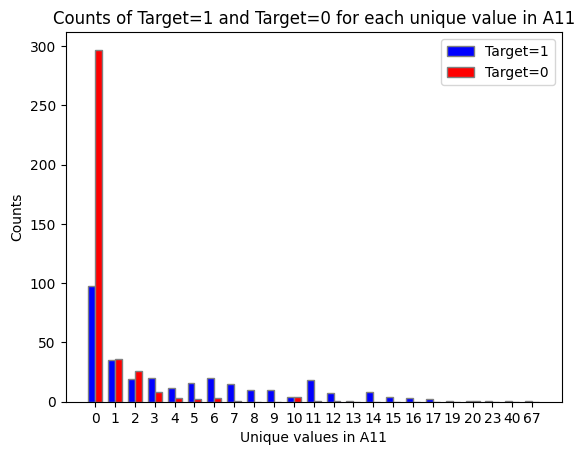

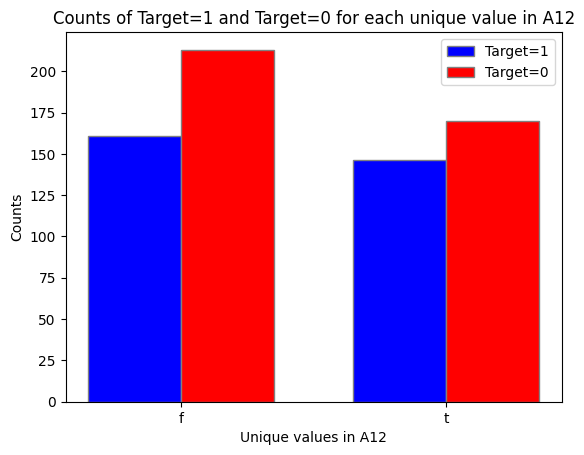

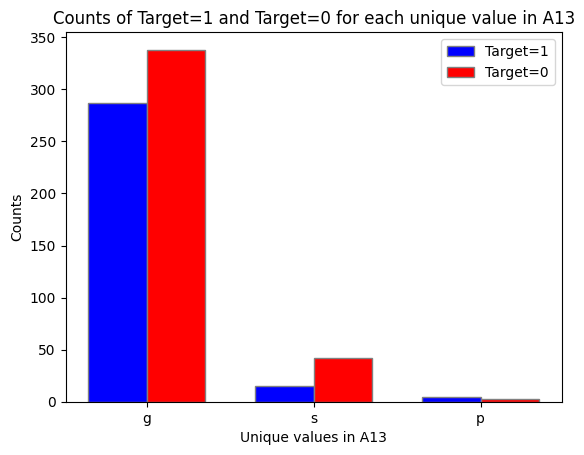

In [ ]:
import numpy as np

def plot_unique_value_counts(df, check, result,positive_val,negative_val):
    # Filter the DataFrame where result is 1
    filtered_df_1 = df[df[result] == positive_val]
    # Filter the DataFrame where result is 0
    filtered_df_0 = df[df[result] == negative_val]

    # Count the occurrences of unique values in the check column where result is 1
    counts_1 = filtered_df_1[check].value_counts()
    # Count the occurrences of unique values in the check column where result is 0
    counts_0 = filtered_df_0[check].value_counts()

    # Align the indices of counts_1 and counts_0
    all_indices = counts_1.index.union(counts_0.index)
    counts_1 = counts_1.reindex(all_indices, fill_value=0)
    counts_0 = counts_0.reindex(all_indices, fill_value=0)

    # Create the bar chart
    bar_width = 0.35
    r1 = np.arange(len(counts_1))
    r2 = [x + bar_width for x in r1]

    plt.bar(r1, counts_1, color='blue', width=bar_width, edgecolor='grey', label=f'{result}=1')
    plt.bar(r2, counts_0, color='red', width=bar_width, edgecolor='grey', label=f'{result}=0')

    plt.xlabel(f'Unique values in {check}')
    plt.ylabel('Counts')
    plt.title(f'Counts of {result}=1 and {result}=0 for each unique value in {check}')
    plt.xticks([r + bar_width/2 for r in range(len(counts_1))], all_indices)

    plt.legend()
    plt.show()

# List of columns to plot
cat_plot_col = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A11", "A12", "A13"]

# Loop through columns and plot
for col in cat_plot_col:
    plot_unique_value_counts(df, col, 'Target',"+","-")

In [ ]:
def calculate_percentages_and_totals(df, col, result):
    # Calculate the counts of 1s and 0s for each unique value in the column
    counts = df.groupby([col, result]).size().unstack(fill_value=0)

    # Calculate the percentages
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Add total instances
    totals = counts.sum(axis=1)

    # Combine percentages and totals into a single DataFrame
    percentages_and_totals = pd.concat([percentages, totals.rename('Total')], axis=1)

    return percentages_and_totals


# List of columns to plot
cat_plot_col = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A11", "A12", "A13"]

# Calculate and print the percentages and total instances for each column
for col in cat_plot_col:
    percentages_and_totals = calculate_percentages_and_totals(df, col, 'Target')
    print(f"Percentages and total instances for column {col}:")
    print(percentages_and_totals)
    print()

Percentages and total instances for column A1:
            +          -  Total
A1                             
a   46.666667  53.333333    210
b   43.541667  56.458333    480

Percentages and total instances for column A4:
             +          -  Total
A4                              
l   100.000000   0.000000      2
u    49.523810  50.476190    525
y    27.607362  72.392638    163

Percentages and total instances for column A5:
             +          -  Total
A5                              
g    49.523810  50.476190    525
gg  100.000000   0.000000      2
p    27.607362  72.392638    163

Percentages and total instances for column A6:
            +          -  Total
A6                             
aa  35.185185  64.814815     54
c   45.205479  54.794521    146
cc  70.731707  29.268293     41
d   23.333333  76.666667     30
e   56.000000  44.000000     25
ff  13.207547  86.792453     53
i   23.728814  76.271186     59
j   30.000000  70.000000     10
k   27.450980  72.549020     51

In [ ]:
df["A2"]

,A2
0,30.83
1,58.67
2,24.50
3,27.83
4,20.17
...,...
685,21.08
686,22.67
687,25.25
688,17.92


Data for Target=1:
 0      0
1    560
2    824
3      3
4      0
Name: A15, dtype: int64
Data for Target=0:
 70    0
71    0
72    0
73    0
74    2
Name: A15, dtype: int64


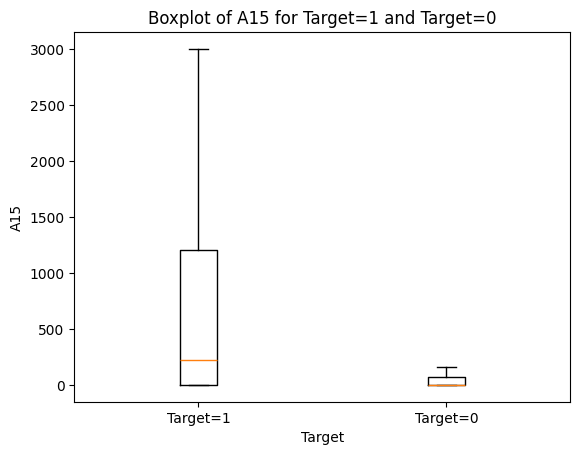

In [ ]:
def plot_boxplots(df, column, result, positive_values, negative_values):
    # Map the Target values to 0 and 1
  #  df[result] = df[result].map({positive_values: 1, negative_values: 0})

    # Filter the DataFrame where result is 1 and 0
    data_1 = df[df[result] == positive_values][column]
    data_0 = df[df[result] == negative_values][column]

    # Check if data is being filtered correctly
    print(f"Data for {result}=1:\n", data_1.head())
    print(f"Data for {result}=0:\n", data_0.head())

    # Check if the filtered data is empty
    if data_1.empty:
        print(f"No data found for {result}=1 in column {column}")
    if data_0.empty:
        print(f"No data found for {result}=0 in column {column}")

    # Create the boxplot
    plt.boxplot([data_1, data_0], showfliers=False, tick_labels=[f'{result}=1', f'{result}=0'])
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.title(f'Boxplot of {column} for {result}=1 and {result}=0')
    plt.show()


# Example usage
plot_boxplots(df, 'A15', 'Target', "+", "-")

In [ ]:
#  1 column is in your foot and the 2nd column is inches. 1 foot = 12 inches
num_cols = df.select_dtypes(include='float').columns.tolist()

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
print("The numerical columns are: ", num_cols)
print("The categorical columns are: ", cat_cols)

The numerical columns are:  ['A2', 'A3', 'A8', 'A14']
The categorical columns are:  ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'Target']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  Target  690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


In [ ]:
df[num_cols]

,A2,A3,A8,A14
0,-0.057723,-0.956613,-0.291083,0.120375
1,2.291317,-0.060051,0.244190,-0.797218
2,-0.591826,-0.856102,-0.216324,0.570514
3,-0.310853,-0.647038,0.456505,-0.468270
4,-0.957176,0.174141,-0.153526,-0.352850
...,...,...,...,...
685,-0.880394,1.070704,-0.291083,0.455094
686,-0.746235,-0.805846,-0.066806,0.108832
687,-0.528544,1.757198,-0.066806,0.108832
688,-1.147023,-0.915403,-0.652915,0.570514


In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,1,-0.057723,-0.956613,2,0,13,8,-0.291083,1,1,1,0,0,0.120375,0,0
1,0,2.291317,-0.060051,2,0,11,3,0.244190,1,1,6,0,0,-0.797218,560,0
2,0,-0.591826,-0.856102,2,0,11,3,-0.216324,1,0,0,0,0,0.570514,824,0
3,1,-0.310853,-0.647038,2,0,13,8,0.456505,1,1,5,1,0,-0.468270,3,0
4,1,-0.957176,0.174141,2,0,13,8,-0.153526,1,0,0,0,2,-0.352850,0,0


In [ ]:
X = df.drop(columns=['Target'])
y = df['Target']

In [ ]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,-0.057723,-0.956613,2,0,13,8,-0.291083,1,1,1,0,0,0.120375,0
1,0,2.291317,-0.060051,2,0,11,3,0.244190,1,1,6,0,0,-0.797218,560
2,0,-0.591826,-0.856102,2,0,11,3,-0.216324,1,0,0,0,0,0.570514,824
3,1,-0.310853,-0.647038,2,0,13,8,0.456505,1,1,5,1,0,-0.468270,3
4,1,-0.957176,0.174141,2,0,13,8,-0.153526,1,0,0,0,2,-0.352850,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
140,0,-0.022285,-0.202777,2,0,2,3,-0.477980,1,1,9,1,0,-0.000817,0
427,1,0.505068,-0.788759,2,0,4,8,-0.652915,0,0,0,0,0,-0.352850,5
633,1,0.076435,-0.521398,3,3,8,2,-0.664877,0,0,0,0,0,-0.352850,0
621,1,-0.746235,-0.923444,2,0,1,4,0.007953,0,0,0,1,2,-1.045372,0
143,1,-0.774923,1.254640,2,0,13,8,-0.066806,1,1,1,0,0,-0.583690,278


In [ ]:
X_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,0,1.207924,1.154129,2,0,11,8,0.830300,1,1,7,1,0,-1.045372,0
600,0,-0.169944,-0.864143,2,0,8,8,-0.503398,1,1,4,0,0,1.147617,500
435,1,-1.055897,-0.956613,3,3,5,2,-0.664877,0,1,4,0,0,-0.785676,1
491,1,-0.619670,-0.780718,2,0,11,8,0.718161,1,1,2,1,0,1.955560,2000
324,1,0.181906,-0.705334,2,0,13,8,-0.316501,0,0,0,0,0,-0.352850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,0.990232,-0.353544,2,0,11,3,1.129335,1,1,11,0,0,-0.583690,0
175,1,-0.380885,-0.655079,3,3,13,8,-0.552738,1,0,0,1,0,0.455094,1065
91,1,-0.007941,2.159244,2,0,1,8,-0.515359,1,0,0,0,0,-0.352850,0
433,1,-0.528544,-0.755590,2,0,0,8,-0.515359,0,0,0,0,0,0.108832,0


In [ ]:
df[14:15]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
14,0,1.207924,1.154129,2,0,11,8,0.8303,1,1,7,1,0,-1.045372,0,0


In [ ]:
### Training a model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0])

### Evaluation the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8768115942028986

In [ ]:
y_train_pred = rf_model.predict(X_train)
y_train_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

1.0

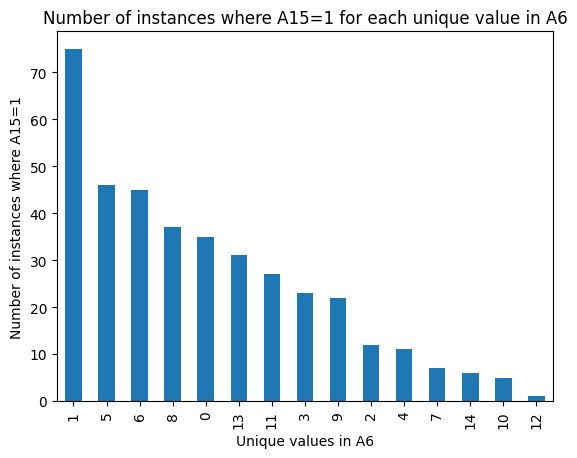

In [ ]:
import matplotlib.pyplot as plt

filtered_df = df[df['Target'] == 1]

# Count the occurrences of unique values in column A6 where A15 is 1
counts = filtered_df['A6'].value_counts()

# Create the bar chart
counts.plot(kind='bar')
plt.xlabel('Unique values in A6')
plt.ylabel('Number of instances where A15=1')
plt.title('Number of instances where A15=1 for each unique value in A6')
plt.show()

In [ ]:
A20 = ["f", "g", "qq", "z", "s"]

label_encoder = LabelEncoder()
A20_encoded = label_encoder.fit_transform(A20)
print ("Encoded values are: ", A20_encoded)

original_values = label_encoder.inverse_transform(A20_encoded)
print(original_values)

Encoded values are:  [0 1 2 4 3]
['f' 'g' 'qq' 'z' 's']


In [ ]:
original_values = label_encoder[col].inverse_transform(df[A6])
print(f"Original values for A6: {original_values}")

TypeError: 'LabelEncoder' object is not subscriptable